In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import py3Dmol
import os
import numpy as np


# Example data (replace with your complete dataset)
data = pd.read_csv("small.csv")

# Convert to DataFrame
df = pd.DataFrame(data)

## Visualize 2D Structure

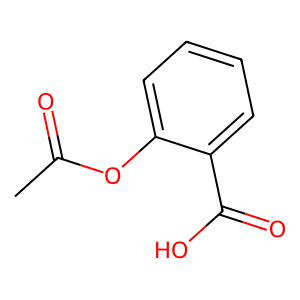

In [2]:
# Convert SMILES to molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in df["SMILES"]]

# Visualize first molecule
Draw.MolToImage(molecules[11])   # Molecule 11 is aspirin

## Convert SMILES to XYZ

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import io

def smiles_to_xyz(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return ""
        
        mol = Chem.AddHs(mol)
        result = AllChem.EmbedMolecule(mol, randomSeed=42)
        if result == -1:
            return ""  # Embedding failed
        
        try:
            AllChem.MMFFOptimizeMolecule(mol)
        except ValueError:
            # If MMFF optimization fails, try UFF
            AllChem.UFFOptimizeMolecule(mol)
        
        xyz = io.StringIO()
        xyz.write(f"{mol.GetNumAtoms()}\n\n")
        
        conf = mol.GetConformer()
        for atom in mol.GetAtoms():
            pos = conf.GetAtomPosition(atom.GetIdx())
            xyz.write(f"{atom.GetSymbol()} {pos.x:.4f} {pos.y:.4f} {pos.z:.4f}\n")
        
        return xyz.getvalue()
    except Exception as e:
        print(f"Error processing SMILES: {smiles}")
        print(f"Error message: {str(e)}")
        return ""

# Generate 3D structures and convert to XYZ format
df['XYZ'] = df['SMILES'].apply(smiles_to_xyz)

print("3D structures have been generated")

3D structures have been generated


## Look at dataset

In [4]:
df

,Drug Name,CAS Registry Number,SMILES,XYZ
0,Atorvastatin,134523-00-5,CC(C)c1n(CC(O)CC(O)CC(=O)Nc2ccccc2)c(c2ccc(F)c...,81\n\nC 0.6016 -1.0895 2.6689\nC -0.6395 -1.82...
1,Simvastatin,79902-63-9,CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC...,68\n\nC -3.6891 3.3359 -0.0005\nC -3.8497 2.65...
2,Metoprolol,37350-58-6,CCc1ccc(OCC(O)CNC(C)C)cc1,40\n\nC 6.4406 -0.0808 1.1856\nC 5.7540 -1.333...
3,Atenolol,29122-68-7,CC(C)NCC(O)COc1ccc(CC(N)=O)cc1,41\n\nC 5.1843 -1.2332 0.2537\nC 5.0868 -0.138...
4,Enalapril,75847-73-3,CCOC(=O)C(CCc1ccccc1)NC(C)C(=O)N1CCCC1C(=O)O,55\n\nC -2.4177 -5.1574 0.5840\nC -2.3087 -4.2...
5,Losartan,114798-26-4,CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nn[nH]n2...,53\n\nC 6.2350 1.9031 -1.7443\nC 5.0339 1.0228...
6,Warfarin,81-81-2,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,39\n\nC -1.4834 3.3184 2.2797\nC -1.0726 2.910...
7,Clopidogrel,113665-84-2,COC(=O)[C@H](c1ccccc1Cl)N1CCc2sccc2C1,37\n\nC -1.6917 3.4356 0.8707\nO -1.0883 2.163...
8,Digoxin,20830-75-5,CC1O[C@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[C@@H]...,
9,Acetaminophen,103-90-2,CC(=O)Nc1ccc(O)cc1,20\n\nC 3.7152 -0.1376 0.0281\nC 2.3576 0.3405...


## Visualize 3D Structure

In [5]:
# Generate 3D structures and store in a dictionary
molecule_structures = {}
for _, row in df.iterrows():
    try:
        molecule_structures[row['Drug Name']] = smiles_to_xyz(row['SMILES'])
    except Exception as e:
        print(f"Error generating 3D structure for {row['Drug Name']}: {e}")

# Visualize molecules
def visualize_molecule(molecule_name):
    if molecule_name not in molecule_structures:
        print(f"Molecule '{molecule_name}' not found in the dataset.")
        return
    
    xyz_data = molecule_structures[molecule_name]
    
    viewer = py3Dmol.view(width=400, height=400)
    viewer.addModel(xyz_data, "xyz")
    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    viewer.render()
    return viewer

In [6]:
visualize_molecule("Aspirin")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
aspirin_coord = df.loc[df['Drug Name'] == 'Aspirin', 'XYZ']

aspirin_coord


11    21\n\nC -2.5959 -2.2696 0.0663\nC -1.7186 -1.1...
Name: XYZ, dtype: object

## B3LYP/aug-cc-pVTZ Optimisation

In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from pyscf import gto, dft

# Function to convert SMILES to XYZ format
def smiles_to_xyz(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return ""
    
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, randomSeed=42)
    
    # Optimize the molecule
    try:
        AllChem.MMFFOptimizeMolecule(mol)
    except:
        AllChem.UFFOptimizeMolecule(mol)
    
    xyz = []
    conf = mol.GetConformer()
    for atom in mol.GetAtoms():
        pos = conf.GetAtomPosition(atom.GetIdx())
        xyz.append(f"{atom.GetSymbol()} {pos.x:.4f} {pos.y:.4f} {pos.z:.4f}")
    
    return "\n".join(xyz)

# Get the SMILES for aspirin and generate XYZ coordinates
aspirin_smiles = df.loc[df['Drug Name'] == 'Aspirin', 'SMILES'].values[0]
aspirin_xyz = smiles_to_xyz(aspirin_smiles)

In [11]:
# Prepare XYZ coordinates for PySCF input
xyz_lines = aspirin_xyz.splitlines()
atom_lines = [line.split() for line in xyz_lines]
atoms = [line[0] for line in atom_lines]
coordinates = np.array([[float(line[1]), float(line[2]), float(line[3])] for line in atom_lines])

pyscf_coord = [(atom, *coord) for atom, coord in zip(atoms, coordinates)]

In [12]:
pyscf_coord

[('C', np.float64(-2.5959), np.float64(-2.2696), np.float64(0.0663)),
 ('C', np.float64(-1.7186), np.float64(-1.1368), np.float64(-0.3754)),
 ('O', np.float64(-1.5688), np.float64(-0.7907), np.float64(-1.5402)),
 ('O', np.float64(-1.1427), np.float64(-0.5502), np.float64(0.7461)),
 ('C', np.float64(-0.2351), np.float64(0.4609), np.float64(0.4172)),
 ('C', np.float64(-0.6983), np.float64(1.7773), np.float64(0.5108)),
 ('C', np.float64(0.164), np.float64(2.8338), np.float64(0.2242)),
 ('C', np.float64(1.4846), np.float64(2.5752), np.float64(-0.1417)),
 ('C', np.float64(1.9498), np.float64(1.2581), np.float64(-0.2159)),
 ('C', np.float64(1.0949), np.float64(0.1822), np.float64(0.0704)),
 ('C', np.float64(1.5903), np.float64(-1.2186), np.float64(0.0218)),
 ('O', np.float64(0.9771), np.float64(-2.2258), np.float64(0.3236)),
 ('O', np.float64(2.8644), np.float64(-1.3011), np.float64(-0.4081)),
 ('H', np.float64(-3.0061), np.float64(-2.7736), np.float64(-0.8136)),
 ('H', np.float64(-3.4225), 

## PySCF CPU

In [ ]:
xyz_lines = aspirin_xyz.splitlines()
atom_lines = [line.split() for line in xyz_lines]
atoms = [line[0] for line in atom_lines]
coordinates = np.array([[float(line[1]), float(line[2]), float(line[3])] for line in atom_lines])


# Set the number of CPU processors
num_processors = 4  # Replace with the desired number of processors
os.environ["OMP_NUM_THREADS"] = str(num_processors)

# Create a PySCF molecule object
mol = gto.Mole()
mol.build(
    atom=xyz_lines,
    basis='aug-cc-pVTZ',
    charge=0,
    spin=0,
    verbose=4,
)

# Perform DFT optimization with B3LYP functional
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

# Retrieve optimized electron density
density_matrix = mf.make_rdm1()
print("Optimized Electron Density Matrix:")
print(density_matrix)

# Optionally, you can also print optimized coordinates after optimization
optimized_coordinates = mol.atom_coords()
print("\nOptimized Coordinates:")
for i, atom in enumerate(atoms):
    print(f"{atom}: {optimized_coordinates[i]}")

System: uname_result(system='Linux', node='BHINDESHI', release='6.8.0-49-generic', version='#49-Ubuntu SMP PREEMPT_DYNAMIC Mon Nov  4 02:06:24 UTC 2024', machine='x86_64')  Threads 12
Python 3.10.15 (main, Oct  3 2024, 07:27:34) [GCC 11.2.0]
numpy 2.1.3  scipy 1.14.1  h5py 3.12.1
Date: Wed Nov 20 02:54:48 2024
PySCF version 2.7.0
PySCF path  /home/mayukh/Softwares/anaconda3/envs/QM_GPU/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 21
[INPUT] num. electrons = 94
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C     -2.595900000000  -2.269600000000   0.066300000000 AA   -4.905540046758  -4.288922412313   0.125288842059 Bohr   0.0
[INPUT]  2 C     -1.718600000000  -1.136800000000  -0.375400000000 AA   -3.24768331

/home/mayukh/Softwares/anaconda3/envs/QM_GPU/lib/python3.10/site-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
tot grids = 261856
init E= -651.004417252083
  HOMO = -0.28946427137704  LUMO = -0.127389919121699
cycle= 1 E= -648.57972112051  delta_E= 2.42  |g|= 1.42  |ddm|= 9.83
  HOMO = -0.133695488579392  LUMO = -0.0446818933063013
cycle= 2 E= -647.491819057521  delta_E= 1.09  |g|= 2.79  |ddm|= 5.46
  HOMO = -0.249160833137361  LUMO = -0.0569402777429504
cycle= 3 E= -648.893582402428  delta_E= -1.4  |g|= 0.509  |ddm|= 3.36
  HOMO = -0.271980591670294  LUMO = -0.0724236966239104
cycle= 4 E= -648.939742630007  delta_E= -0.0462  |g|= 0.16  |ddm|= 0.861
  HOMO = -0.276026309652944  LUMO = -0.0759438697743541
cycle= 5 E= -648.943398849347  delta_E= -0.00366  |g|= 0.0526  |ddm|= 0.261
  HOMO = -0.271726617816843  LUMO = -0.0716122010083207
cycle= 6 E= -648.943988992403  delta_E= -0.00059  |g|= 0.0138  |ddm|= 0.0817
  HOMO = -0.271414860902806  LUMO = -0.0714697344994676


## PySCF GPU

In [ ]:
import pyscf
from gpu4pyscf.dft import rks

atoms = pyscf_format


mol = pyscf.M(atom=atoms,               # can a string, list, or xyz filename
              charge=0,                # assign total charge
              spin=None,               # if spin = None, spin = # of electrons %2
              basis='6-31g',      # basis set
              verbose=1,               # control print info
              output='pyscf.log'       # log file
              )

mf = rks.RKS(mol,
             xc='b3lyp'                # xc functionals, PBE, TPSS, wb97m-v
             ).density_fit()           # use density fitting

mf.grids.atom_grid = (99,590)          # Set up Lebedev grids
mf.conv_tol = 1e-10                    # SCF convergence tolerance
mf.max_cycle = 50                      # max number of SCF iteractions

e_dft = mf.kernel()                    # compute total energy

g = mf.nuc_grad_method()               # create a gradient object
g_dft = g.kernel()                     # compute analytical gradient

h = mf.Hessian()                       # create a Hessian object
h_dft = h.kernel()                     # compute analytical Hessian